# Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset:

In [72]:
df=pd.read_csv("Automobile_insurance_fraud.csv")
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

# EDA:

In [73]:
df.shape

(1000, 40)

In [74]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [75]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [76]:
df["policy_bind_Day"] = df['policy_bind_date'].dt.day
df["policy_bind_Month"] = df['policy_bind_date'].dt.month
df["policy_bind_Year"] = df['policy_bind_date'].dt.year

In [77]:
df["incident_Day"] = df['incident_date'].dt.day
df["incident_Month"] = df['incident_date'].dt.month

In [78]:
df.drop(["policy_bind_date","incident_date"],axis=1,inplace=True)

In [79]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   3
bodily_injuries                   3
witnesses                   

In [80]:
df.drop("policy_number",axis=1,inplace=True)
df.drop("incident_location",axis=1,inplace=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

In [82]:
#Due to many NaN values,let's drop '_c39' column.
df.drop('_c39',axis=1,inplace=True)

In [83]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

In [84]:
for i in df.columns:
    print(df[i].value_counts())
    print('____________')

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
____________
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
____________
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
____________
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
____________
1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64
____________
1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13    2
          ..
1085.03    1
1437.33    1
988.29     1
1238.89    1


In [85]:
df['collision_type'] = df['collision_type'].replace('?',df['collision_type'].mode()[0])

In [86]:
df['property_damage'] = df['property_damage'].replace('?','NO')
df['police_report_available'] = df['police_report_available'].replace('?','NO')

In [87]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [88]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [89]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [90]:
df.drop("umbrella_limit",axis=1,inplace=True)

In [91]:
df.drop('insured_zip',axis=1,inplace=True)

In [92]:
df.describe

<bound method NDFrame.describe of      months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium insured_sex insured_education_level  \

<AxesSubplot:>

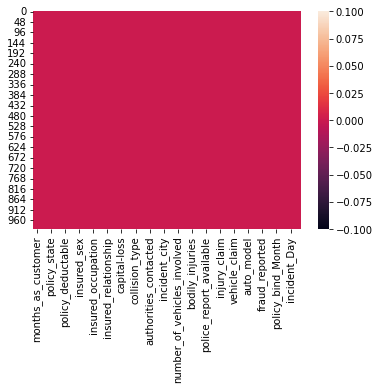

In [93]:
sns.heatmap(df.isnull())

# Data Visualisation:

Univariate Analysis:

In [94]:
df

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium insured_sex insured_education_level  \
0                  1406.91        MALE                      MD   
1                  1197.22        MALE                      MD   
2                  1413.14      FEMALE                     PhD   
3                  1415.74      FEMALE                     PhD   
4                  1583.91        MALE               Associate   
..                     ...         ...                     ...   
995                1310.80      FEMALE                 Masters   
996                1436.79      FEMALE                     PhD   
997                1383.49      FEMALE                 Masters   
998                1356.92        MALE               Associate   
999                 766.19      FEMALE               Associate   

    insured_occupation insured_hobbies  ... vehicle_claim   auto_make  \
0         craft-repair        sleeping  ...         52080        Saab   
1    machine-op-inspct         reading  ...          3510    Mercedes   
2                sales     board-games  ...         23100       Dodge   
3         armed-forces     board-games  ...         50720   Chevrolet   
4                sales     board-games  ...          4550      Accura   
..                 ...             ...  ...           ...         ...   
995       craft-repair       paintball  ...         61040       Honda   
996     prof-specialty        sleeping  ...         72320  Volkswagen   
997       armed-forces  bungie-jumping  ...         52500      Suburu   
998  handlers-cleaners    base-jumping  ...         36540        Audi   
999              sales        kayaking  ...          3680    Mercedes   

     auto_model auto_year fraud_reported policy_bind_Day policy_bind_Month  \
0           92x      2004              Y              17                10   
1          E400      2007              Y              27                 6   
2           RAM      2007              N               9                 6   
3         Tahoe      2014              Y              25                 5   
4           RSX      2009              N               6                 6   
..          ...       ...            ...             ...               ...   
995      Accord      2006              N              16                 7   
996      Passat      2015              N               1                 5   
997     Impreza      1996              N              17                 2   
998          A5      1998              N              18                11   
999        E400      2007              N              11                11   

    policy_bind_Year incident_Day  incident_Month  
0               2014           25               1  
1               2006           21               1  
2               2000           22               2  
3               1990            1              10  
4               2014           17               2  
..               ...          ...             ...  
995             1991           22               2  
996             2014           24               1  
997             2003         

In [95]:
df.nunique()

months_as_customer             391
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
total_claim_amount             763
injury_claim                   638
property_claim                 626
vehicle_claim       

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

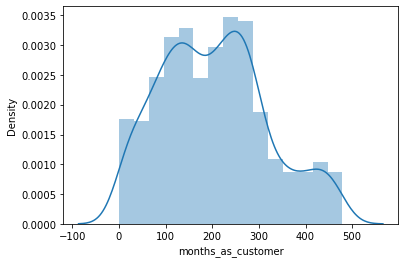

In [96]:
sns.distplot(df['months_as_customer'])

<AxesSubplot:xlabel='age', ylabel='Density'>

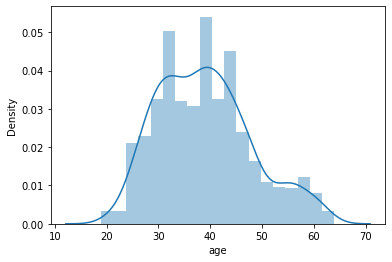

In [97]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='policy_state', ylabel='count'>

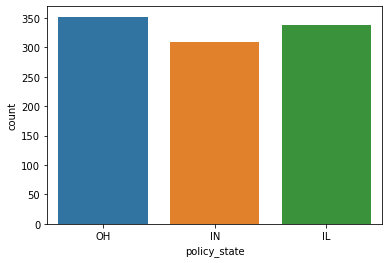

In [98]:
sns.countplot(df['policy_state'])

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

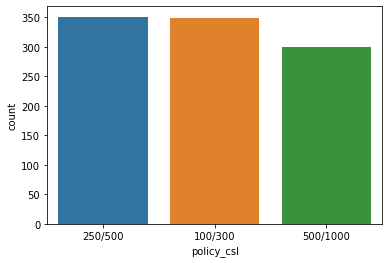

In [99]:
sns.countplot(df['policy_csl'])

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

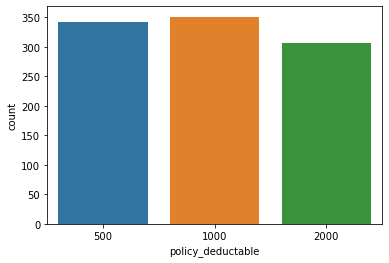

In [100]:
sns.countplot(df['policy_deductable'])

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Count'>

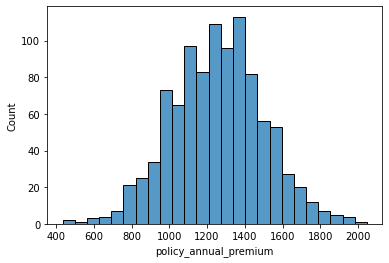

In [101]:
sns.histplot(df['policy_annual_premium'])

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

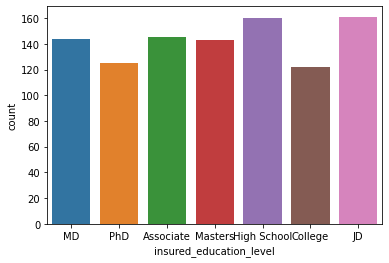

In [102]:
sns.countplot(df['insured_education_level'])

Bivariate Analysis:

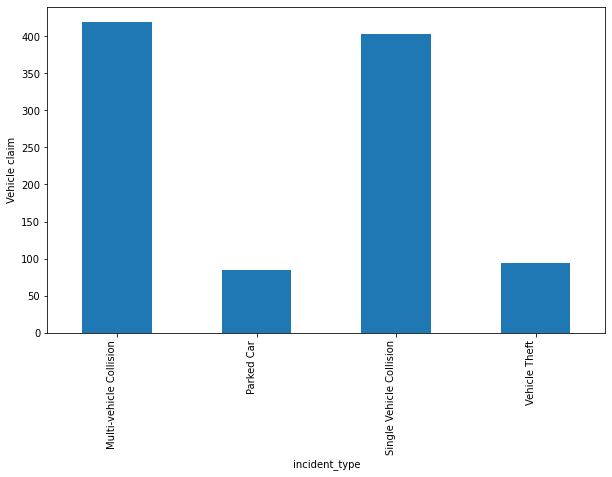

In [103]:
fig = plt.figure(figsize=(10,6))
x= df.groupby('incident_type').vehicle_claim.count().plot.bar(ylim=0)
x.set_ylabel('Vehicle claim')
x.set_xticklabels(x.get_xticklabels(), rotation=90, ha="right")
plt.show()

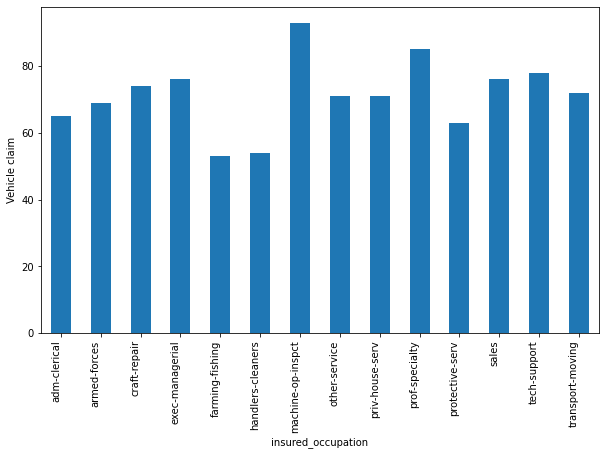

In [104]:
fig = plt.figure(figsize=(10,6))
x= df.groupby('insured_occupation').vehicle_claim.count().plot.bar(ylim=0)
x.set_ylabel('Vehicle claim')
x.set_xticklabels(x.get_xticklabels(),rotation=90,ha="right")
plt.show()

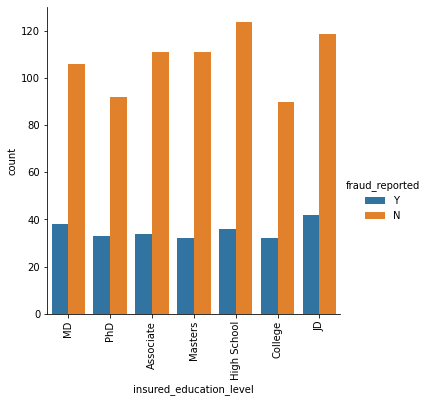

In [105]:
sns.factorplot('insured_education_level',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)
plt.show()

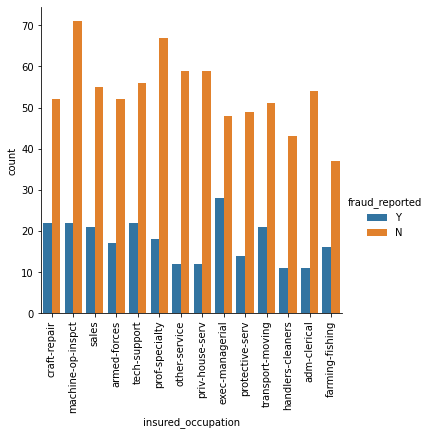

In [106]:
sns.factorplot('insured_occupation',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)
plt.show()

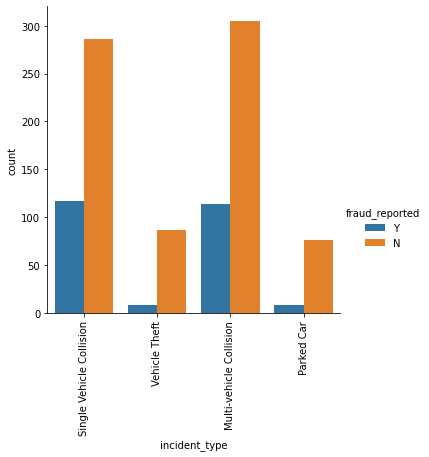

In [107]:
sns.catplot('incident_type',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)
plt.show()

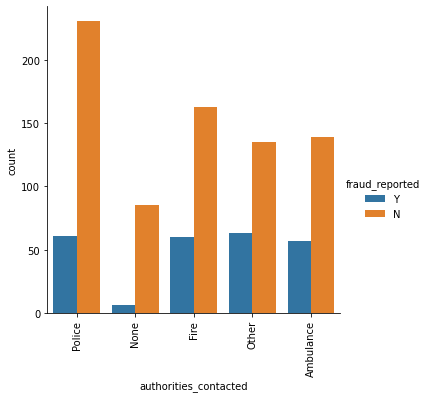

In [108]:
sns.catplot('authorities_contacted',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)
plt.show()

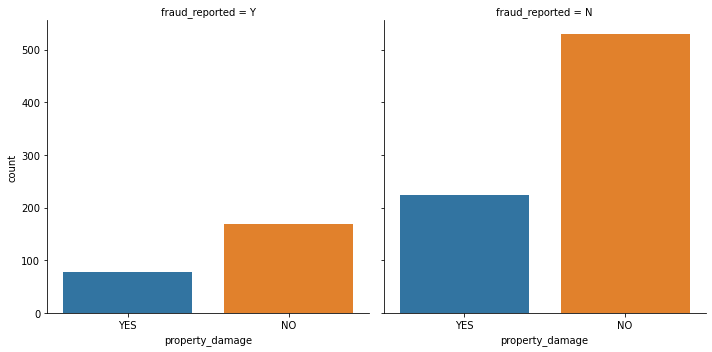

In [109]:
sns.catplot('property_damage',kind='count',data=df,col='fraud_reported')
plt.show()

# Multivariate Analysis:

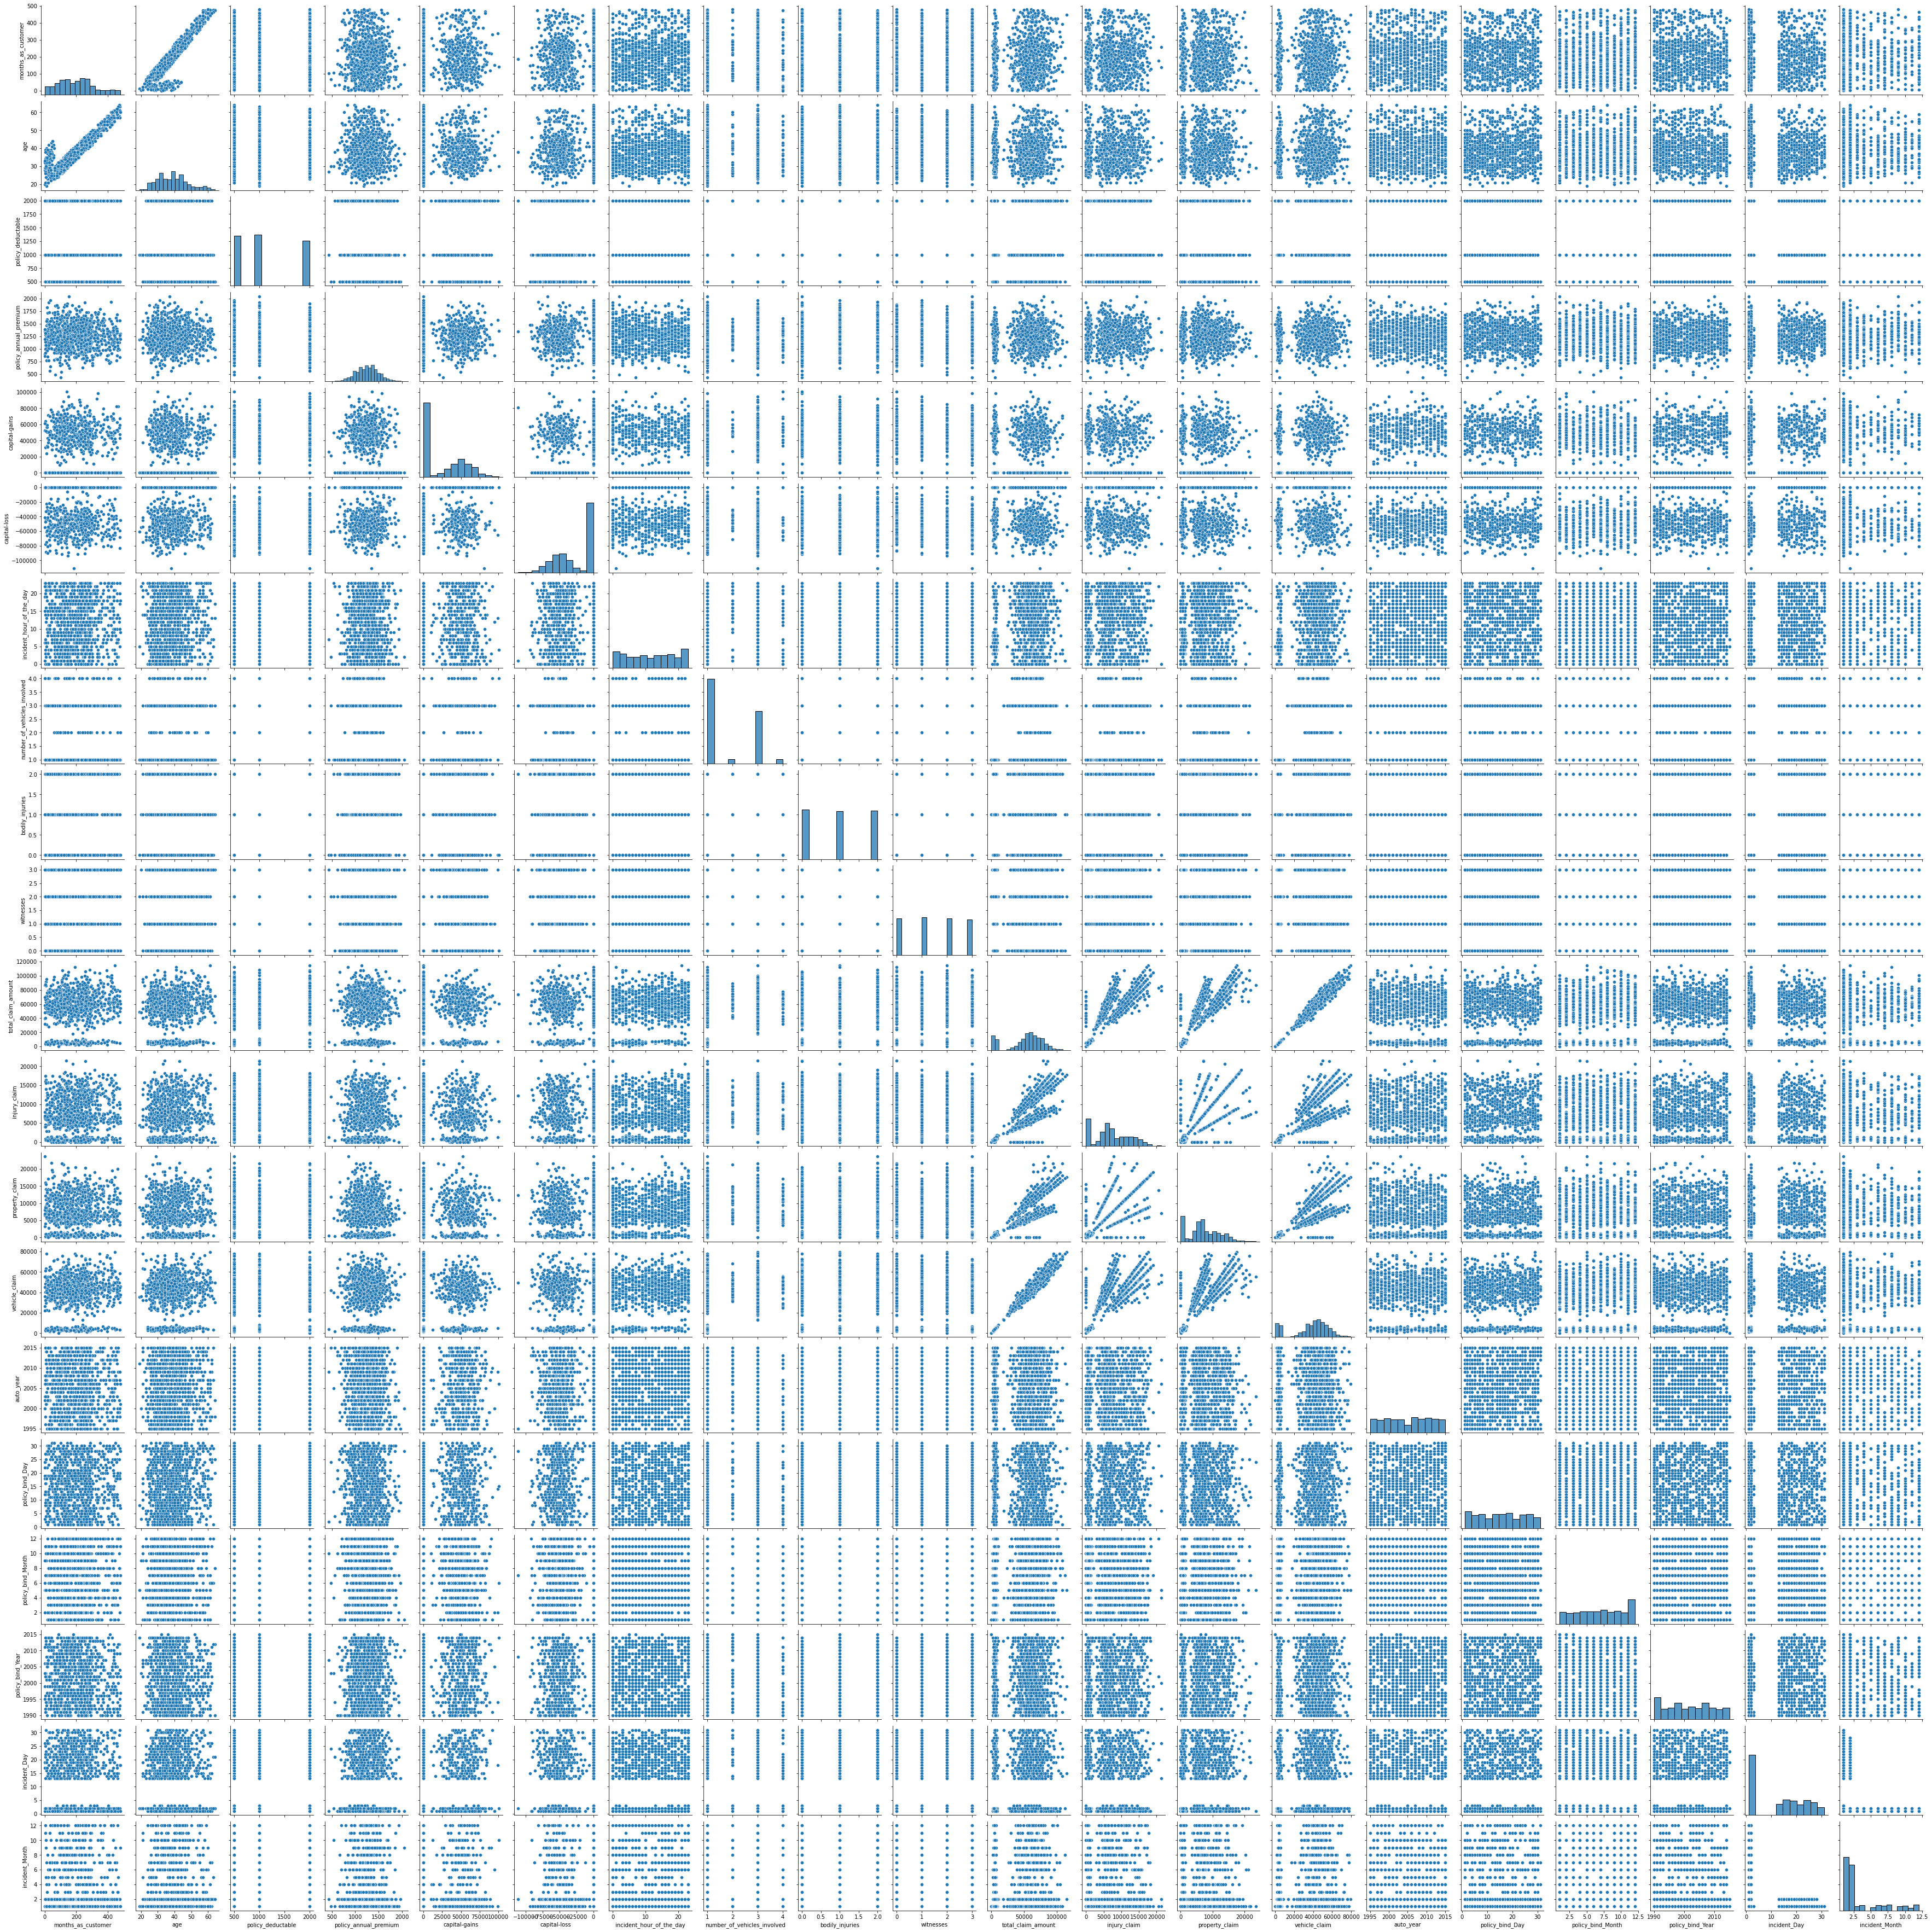

In [110]:
sns.pairplot(df)

# Outliers:

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'months_as_customer'),
  Text(2, 0, 'age'),
  Text(3, 0, 'policy_deductable'),
  Text(4, 0, 'policy_annual_premium'),
  Text(5, 0, 'capital-gains'),
  Text(6, 0, 'capital-loss'),
  Text(7, 0, 'incident_hour_of_the_day'),
  Text(8, 0, 'number_of_vehicles_involved'),
  Text(9, 0, 'bodily_injuries'),
  Text(10, 0, 'witnesses'),
  Text(11, 0, 'total_claim_amount'),
  Text(12, 0, 'injury_claim'),
  Text(13, 0, 'property_claim'),
  Text(14, 0, 'vehicle_claim'),
  Text(15, 0, 'auto_year'),
  Text(16, 0, 'policy_bind_Day'),
  Text(17, 0, 'policy_bind_Month'),
  Text(18, 0, 'policy_bind_Year'),
  Text(19, 0, 'incident_Day'),
  Text(20, 0, 'incident_Month')])

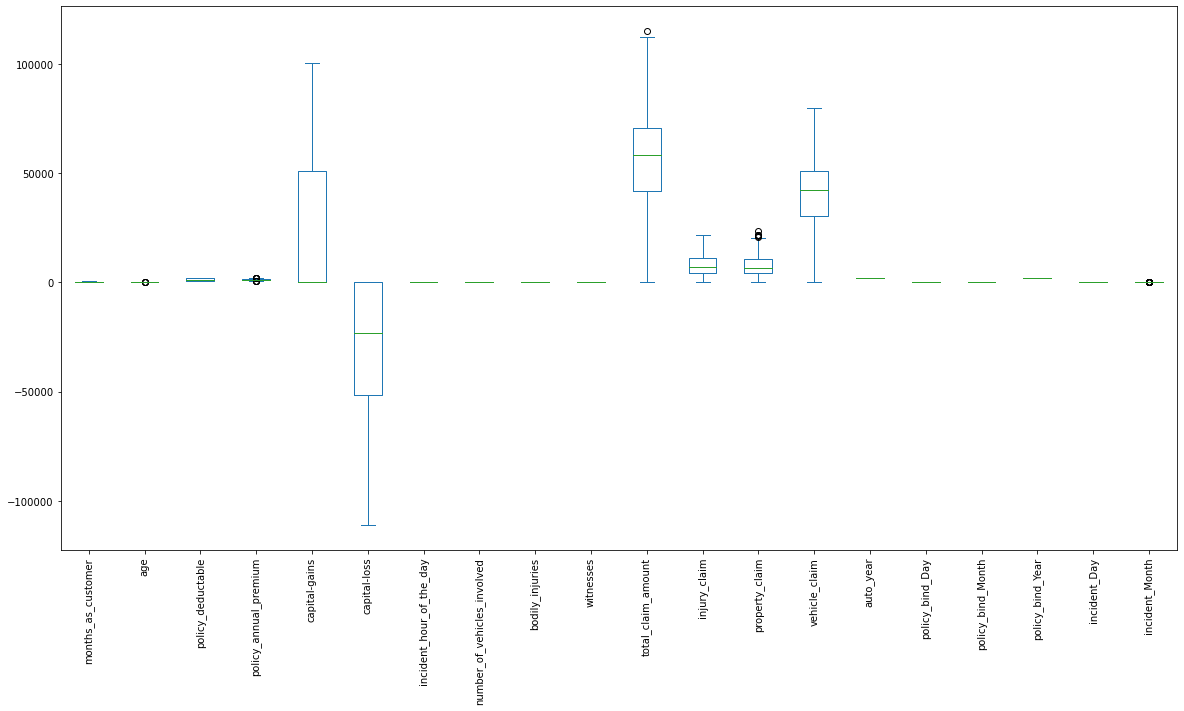

In [111]:
df.plot(kind='box',fontsize=10,figsize=(20,10))
plt.xticks(rotation=90)

# Removing the Outliers:

In [112]:
cols = df[['age','policy_annual_premium','total_claim_amount','property_claim']]

In [113]:
from scipy.stats import zscore
z=np.abs(zscore(cols))
df_new=df[(z<3).all(axis=1)]
df_new

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium insured_sex insured_education_level  \
0                  1406.91        MALE                      MD   
1                  1197.22        MALE                      MD   
2                  1413.14      FEMALE                     PhD   
3                  1415.74      FEMALE                     PhD   
4                  1583.91        MALE               Associate   
..                     ...         ...                     ...   
995                1310.80      FEMALE                 Masters   
996                1436.79      FEMALE                     PhD   
997                1383.49      FEMALE                 Masters   
998                1356.92        MALE               Associate   
999                 766.19      FEMALE               Associate   

    insured_occupation insured_hobbies  ... vehicle_claim   auto_make  \
0         craft-repair        sleeping  ...         52080        Saab   
1    machine-op-inspct         reading  ...          3510    Mercedes   
2                sales     board-games  ...         23100       Dodge   
3         armed-forces     board-games  ...         50720   Chevrolet   
4                sales     board-games  ...          4550      Accura   
..                 ...             ...  ...           ...         ...   
995       craft-repair       paintball  ...         61040       Honda   
996     prof-specialty        sleeping  ...         72320  Volkswagen   
997       armed-forces  bungie-jumping  ...         52500      Suburu   
998  handlers-cleaners    base-jumping  ...         36540        Audi   
999              sales        kayaking  ...          3680    Mercedes   

     auto_model auto_year fraud_reported policy_bind_Day policy_bind_Month  \
0           92x      2004              Y              17                10   
1          E400      2007              Y              27                 6   
2           RAM      2007              N               9                 6   
3         Tahoe      2014              Y              25                 5   
4           RSX      2009              N               6                 6   
..          ...       ...            ...             ...               ...   
995      Accord      2006              N              16                 7   
996      Passat      2015              N               1                 5   
997     Impreza      1996              N              17                 2   
998          A5      1998              N              18                11   
999        E400      2007              N              11                11   

    policy_bind_Year incident_Day  incident_Month  
0               2014           25               1  
1               2006           21               1  
2               2000           22               2  
3               1990            1              10  
4               2014           17               2  
..               ...          ...             ...  
995             1991           22               2  
996             2014           24               1  
997             2003         

In [114]:
df.shape

(1000, 38)

In [115]:
df_new.shape

(996, 38)

# Percentage of Loss:

In [116]:
Loss = (1000-996)/1000*100
Loss

0.4

# Skewness:

In [117]:
df_new.skew()

months_as_customer             0.359605
age                            0.474526
policy_deductable              0.473229
policy_annual_premium          0.032042
capital-gains                  0.478850
capital-loss                  -0.393015
incident_hour_of_the_day      -0.039123
number_of_vehicles_involved    0.500364
bodily_injuries                0.011117
witnesses                      0.025758
total_claim_amount            -0.593473
injury_claim                   0.267970
property_claim                 0.357130
vehicle_claim                 -0.619755
auto_year                     -0.049276
policy_bind_Day                0.028923
policy_bind_Month             -0.029722
policy_bind_Year               0.058499
incident_Day                   0.055659
incident_Month                 1.377097
dtype: float64

In [118]:
sk= ["total_claim_amount","vehicle_claim"]

In [119]:
from sklearn.preprocessing import PowerTransformer
Scaler=PowerTransformer(method='yeo-johnson')

In [120]:
df_new[sk] = Scaler.fit_transform(df_new[sk].values)

# Encoding:

In [121]:
cat_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)
print(cat_cols)

['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [122]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new[cat_cols]= df_new[cat_cols].apply(le.fit_transform)

# Correlation:

In [123]:
df_new.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922092      0.000118   
age                                    0.922092  1.000000     -0.015182   
policy_state                           0.000118 -0.015182      1.000000   
policy_csl                            -0.022964 -0.012429     -0.000349   
policy_deductable                      0.023512  0.026772      0.010740   
policy_annual_premium                 -0.003378  0.005890      0.014475   
insured_sex                            0.059002  0.072900     -0.019294   
insured_education_level               -0.000848  0.001485     -0.032551   
insured_occupation                     0.005365  0.014030     -0.031016   
insured_hobbies                       -0.092575 -0.080587     -0.040215   
insured_relationship                   0.071097  0.075940     -0.018855   
capital-gains                          0.007601 -0.006333      0.072552   
capital-loss                           0.020771  0.008192     -0.032268   
incident_type                         -0.017202 -0.025979      0.031769   
collision_type                        -0.072479 -0.075892      0.050953   
incident_severity                     -0.061932 -0.060361     -0.026728   
authorities_contacted                  0.011406  0.016000     -0.017738   
incident_state                         0.006906  0.007053      0.009195   
incident_city                         -0.001837 -0.004009     -0.004475   
incident_hour_of_the_day               0.068962  0.085509      0.026464   
number_of_vehicles_involved            0.013609  0.021140     -0.043447   
property_damage                        0.002663 -0.005795     -0.009334   
bodily_injuries                       -0.011126 -0.017461      0.008992   
witnesses                              0.063530  0.056658      0.024809   
police_report_available               -0.018760 -0.018493      0.065957   
total_claim_amount                     0.064662  0.070582     -0.008788   
injury_claim                           0.066416  0.075480     -0.046398   
property_claim                         0.041157  0.064230      0.002678   
vehicle_claim                          0.062392  0.062165     -0.000472   
auto_make                              0.049222  0.032105      0.015848   
auto_model                             0.002908  0.016258     -0.024513   
auto_year                              0.001287  0.003268      0.002323   
fraud_reported                         0.020966  0.012408      0.028864   
policy_bind_Day                        0.054175  0.054465      0.001030   
policy_bind_Month                      0.004955  0.015874      0.071527   
policy_bind_Year                      -0.046010 -0.035505     -0.005709   
incident_Day                          -0.013502 -0.008174      0.013370   
incident_Month                         0.022949  0.021773      0.026176   

                             policy_csl  policy_deductable  \
months_as_customer            -0.022964           0.023512   
age                           -0.012429           0.026772   
policy_state                  -0.000349           0.010740   
policy_csl                     1.000000           0.006149   
policy_deductable              0.006149           1.000000   
policy_annual_premium          0.030864          -0.008445   
insured_sex                   -0.008369          -0.011671   
insured_education_level        0.010380           0.014571   
insured_occupation             0.019598          -0.050024   
insured_hobbies               -0.007445           0.005134   
insured_relationship          -0.031813          -0.021763   
capital-gains                  0.004234           0.035950   
capital-loss                  -0.034396          -0.024018   
incident_type                  0.012411          -0.038696   
collision_type                 0.020799          -0.054153   
incident_severity              0.024522          -0.017352   
authorities_contacted          0.055746          

<AxesSubplot:>

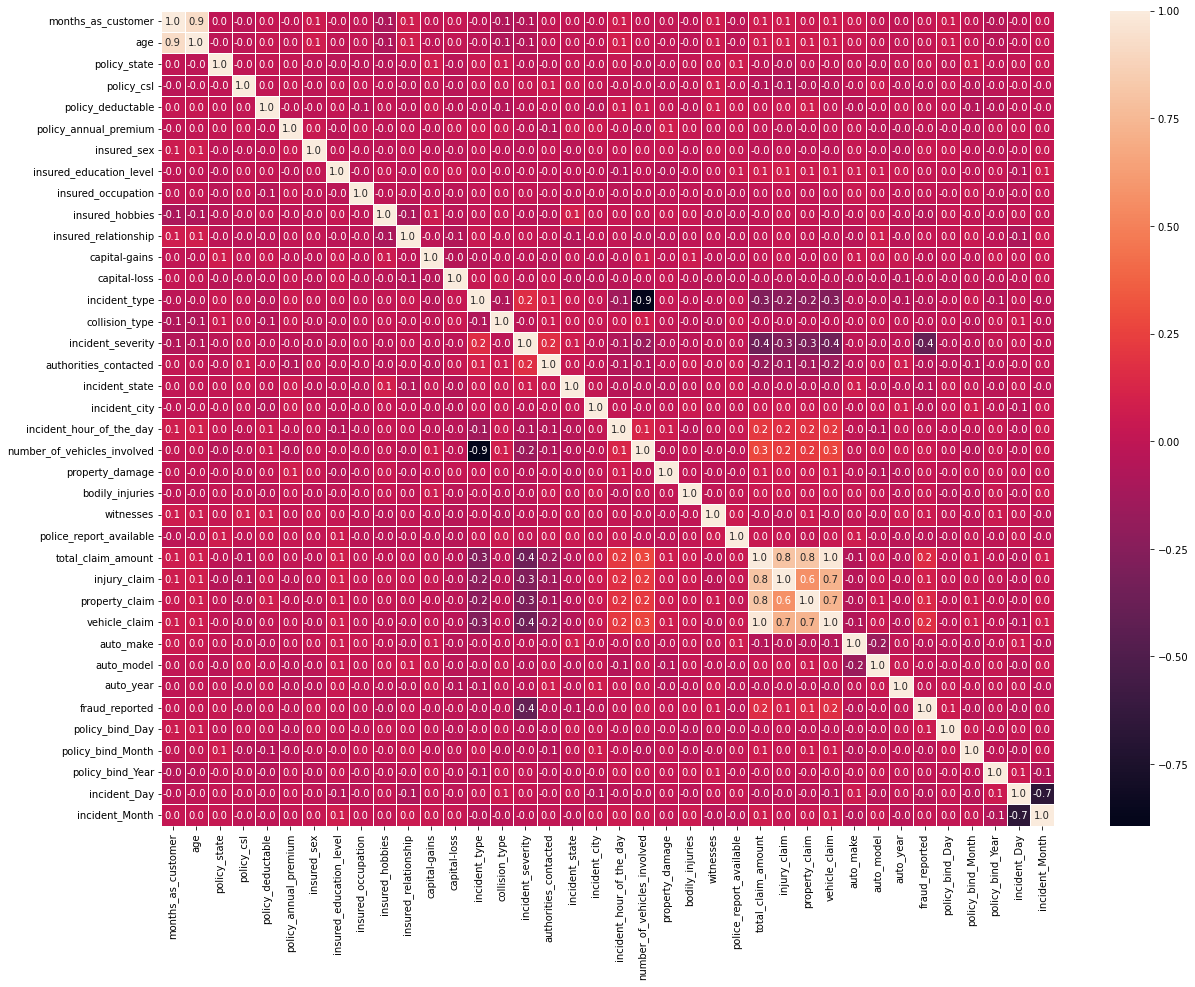

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(),annot=True,linewidth=0.5,fmt='.1f')

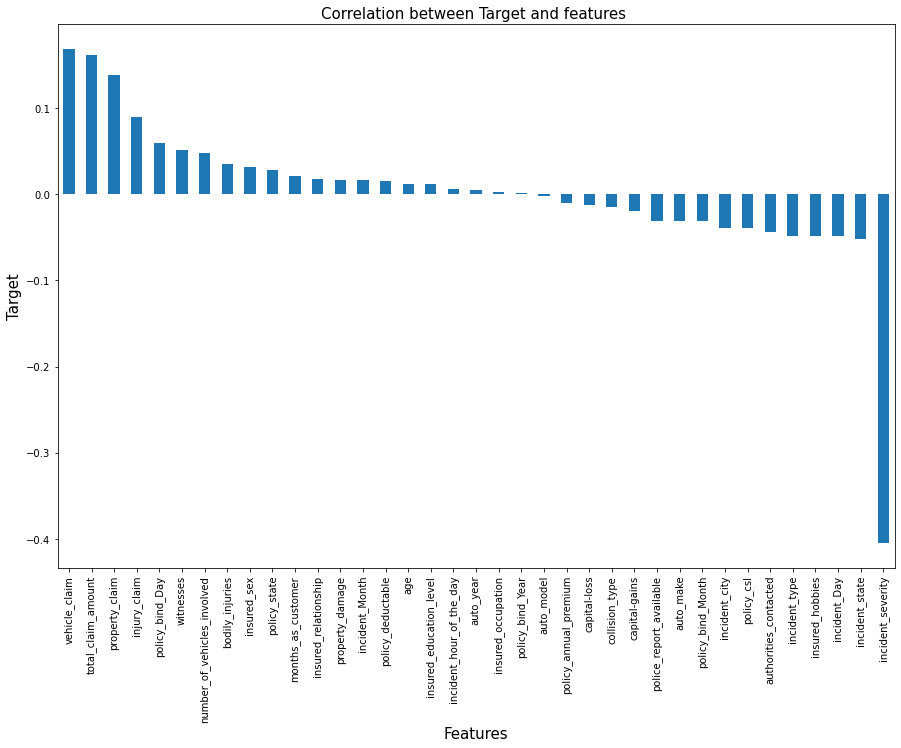

In [125]:
plt.figure(figsize=(15,10))
df_new.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.xticks(rotation=90)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()

# Separating the Features and Target:

In [126]:
x = df_new.drop("fraud_reported", axis=1)
y = df_new["fraud_reported"]

In [127]:
x.shape

(996, 37)

In [128]:
y.shape

(996,)

# Scaling:

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

months_as_customer       age  policy_state  policy_csl  \
0              1.074671  0.987190      1.186130    0.063660   
1              0.204846  0.330455     -0.018137    0.063660   
2             -0.612790 -1.092470      1.186130   -1.179582   
3              0.448397  0.221000     -1.222403    0.063660   
4              0.204846  0.549367     -1.222403    1.306902   
..                  ...       ...           ...         ...   
991           -1.752261 -0.107368      1.186130    1.306902   
992            0.700646  0.221000     -1.222403   -1.179582   
993           -0.647583 -0.545191      1.186130    0.063660   
994            2.205443  2.519571     -1.222403    1.306902   
995            2.188047  2.300659      1.186130    0.063660   

     policy_deductable  policy_annual_premium  insured_sex  \
0            -0.224722               0.621371     1.075102   
1             1.409024              -0.251375     1.075102   
2             1.409024               0.647301    -0.930144   
3             1.409024               0.658123    -0.930144   
4            -0.224722               1.358059     1.075102   
..                 ...                    ...          ...   
991          -0.224722               0.221354    -0.930144   
992          -0.224722               0.745734    -0.930144   
993          -1.041595               0.523896    -0.930144   
994           1.409024               0.413309     1.075102   
995          -0.224722              -2.045355    -0.930144   

     insured_education_level  insured_occupation  insured_hobbies  ...  \
0                   0.531088           -1.162296         1.280299  ...   
1                   0.531088           -0.166257         0.928186  ...   
2                   1.557206            1.078792        -1.360550  ...   
3                   1.557206           -1.411305        -1.360550  ...   
4                  -1.521148            1.078792        -1.360550  ...   
..                       ...                 ...              ...  ...   
991                 1.044147           -1.162296         0.576073  ...   
992                 1.557206            0.580773         1.280299  ...   
993                 1.044147           -1.411305        -1.184493  ...   
994                -1.521148           -0.415266        -1.712663  ...   
995                -1.521148            1.078792         0.223960  ...   

     property_claim  vehicle_claim  auto_make  auto_model  auto_year  \
0          1.174449       0.754553   0.857248   -1.644810  -0.182338   
1         -1.376935      -1.787353   0.360986   -0.657437   0.316587   
2         -0.737005      -0.820820  -0.631538    0.958263   0.316587   
3         -0.217973       0.678427  -0.879669    1.317308   1.480744   
4         -1.404033      -1.740710  -1.624063    1.048024   0.649203   
..              ...            ...        ...         ...        ...   
991        0.278129       1.260237  -0.135276   -1.196004   0.150278   
992        2.229188       1.906028   1.601641    0.778741   1.647052   
993        0.023825       0.778098   1.105379   -0.029109  -1.512803   
994       -0.451433      -0.103792  -1.375932   -1.285765  -1.180187   
995       -1.347752      -1.779803   0.360986   -0.657437   0.316587   

     policy_bind_Day  policy_bind_Month  policy_bind_Year  incident_Day  \
0           0.177487           1.013751          1.686176      1.139807   
1           1.309223          -0.166145          0.599693      0.756374   
2          -0.727901          -0.166145         -0.215170      0.852233   
3           1.082875          -0.461119         -1.573274     -1.160788   
4          -1.067422          -0.166145          1.686176      0.372942   
..               ...                ...               ...           ...   
991         0.064313           0.128829         -1.437463      0.852233   
992        -1.633290          -0.461119          1.686176      1.043949   
993         0.177487          -1.346040          0.192262      0.948091   

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

months_as_customer       age  policy_state  policy_csl  policy_deductable  \
0            1.074671  0.987190      1.186130    0.063660          -0.224722   
1            0.204846  0.330455     -0.018137    0.063660           1.409024   
2           -0.612790 -1.092470      1.186130   -1.179582           1.409024   
3            0.448397  0.221000     -1.222403    0.063660           1.409024   
4            0.204846  0.549367     -1.222403    1.306902          -0.224722   

   policy_annual_premium  insured_sex  insured_education_level  \
0               0.621371     1.075102                 0.531088   
1              -0.251375     1.075102                 0.531088   
2               0.647301    -0.930144                 1.557206   
3               0.658123    -0.930144                 1.557206   
4               1.358059     1.075102                -1.521148   

   insured_occupation  insured_hobbies  ...  property_claim  vehicle_claim  \
0           -1.162296         1.280299  ...        1.174449       0.754553   
1           -0.166257         0.928186  ...       -1.376935      -1.787353   
2            1.078792        -1.360550  ...       -0.737005      -0.820820   
3           -1.411305        -1.360550  ...       -0.217973       0.678427   
4            1.078792        -1.360550  ...       -1.404033      -1.740710   

   auto_make  auto_model  auto_year  policy_bind_Day  policy_bind_Month  \
0   0.857248   -1.644810  -0.182338         0.177487           1.013751   
1   0.360986   -0.657437   0.316587         1.309223          -0.166145   
2  -0.631538    0.958263   0.316587        -0.727901          -0.166145   
3  -0.879669    1.317308   1.480744         1.082875          -0.461119   
4  -1.624063    1.048024   0.649203        -1.067422          -0.166145   

   policy_bind_Year  incident_Day  incident_Month  
0          1.686176      1.139807       -0.735300  
1          0.599693      0.756374       -0.735300  
2         -0.215170      0.852233       -0.429896  
3         -1.573274     -1.160788        2.013335  
4          1.686176      0.372942       -0.429896  

[5 rows x 37 columns]

# VIF:

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

VIF values                     Features
0       6.849384           months_as_customer
1       6.853534                          age
2       1.038264                 policy_state
3       1.031983                   policy_csl
4       1.046097            policy_deductable
5       1.037977        policy_annual_premium
6       1.031830                  insured_sex
7       1.048274      insured_education_level
8       1.017472           insured_occupation
9       1.051069              insured_hobbies
10      1.048872         insured_relationship
11      1.038649                capital-gains
12      1.041509                 capital-loss
13      5.146818                incident_type
14      1.046697               collision_type
15      1.239870            incident_severity
16      1.106184        authorities_contacted
17      1.045232               incident_state
18      1.030154                incident_city
19      1.103667     incident_hour_of_the_day
20      5.116370  number_of_vehicles_involved
21      1.030435              property_damage
22      1.028162              bodily_injuries
23      1.044614                    witnesses
24      1.039770      police_report_available
25  43178.393902           total_claim_amount
26   1591.913854                 injury_claim
27   1545.342793               property_claim
28  21497.485367                vehicle_claim
29      1.076670                    auto_make
30      1.066150                   auto_model
31      1.041247                    auto_year
32      1.022509              policy_bind_Day
33      1.039719            policy_bind_Month
34      1.029385             policy_bind_Year
35      1.850281                 incident_Day
36      1.856568               incident_Month

In [132]:
x.drop(["total_claim_amount"],axis=1,inplace=True)

In [133]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

VIF values                     Features
0     6.847532           months_as_customer
1     6.853444                          age
2     1.038222                 policy_state
3     1.030771                   policy_csl
4     1.044563            policy_deductable
5     1.037297        policy_annual_premium
6     1.028839                  insured_sex
7     1.048237      insured_education_level
8     1.016766           insured_occupation
9     1.049250              insured_hobbies
10    1.048847         insured_relationship
11    1.038556                capital-gains
12    1.041292                 capital-loss
13    5.135973                incident_type
14    1.046544               collision_type
15    1.195165            incident_severity
16    1.084515        authorities_contacted
17    1.040762               incident_state
18    1.029162                incident_city
19    1.097674     incident_hour_of_the_day
20    5.105125  number_of_vehicles_involved
21    1.030219              property_damage
22    1.025993              bodily_injuries
23    1.044575                    witnesses
24    1.038375      police_report_available
25    2.175284                 injury_claim
26    2.254268               property_claim
27    3.353164                vehicle_claim
28    1.073862                    auto_make
29    1.065580                   auto_model
30    1.040631                    auto_year
31    1.022447              policy_bind_Day
32    1.039695            policy_bind_Month
33    1.029180             policy_bind_Year
34    1.850274                 incident_Day
35    1.855673               incident_Month

# Balancing the Data:

In [136]:
y.value_counts()

0    750
1    246
Name: fraud_reported, dtype: int64

In [137]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [139]:
y.value_counts()

1    750
0    750
Name: fraud_reported, dtype: int64

# Finding Best Random State:

In [179]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [142]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train, y_train)
    pred = RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9266666666666666  on Random_state  80


In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

# Random Forest Classifier:

In [145]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.9233333333333333
[[140   7]
 [ 16 137]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       147
           1       0.95      0.90      0.92       153

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



Text(0.5, 1.0, 'Confusion Matrix for RandomForestClassifier')

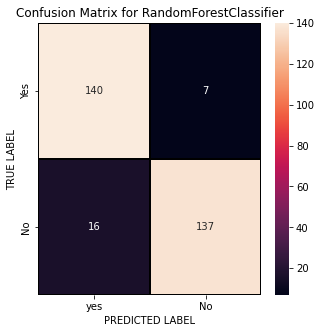

In [146]:
cm = confusion_matrix(y_test,predRFC)
x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2,linecolor="black",fmt = ".0f",ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')

# Decision Tree Classifier:

In [147]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is  ',acc)
print('Confusion Matrix is ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report is ','\n',classification_report(y_test,pred))

Accuracy_Score is   0.86
Confusion Matrix is  
 [[129  18]
 [ 24 129]]
Classification Report is  
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       147
           1       0.88      0.84      0.86       153

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



Text(0.5, 1.0, 'Confusion Matrix for DecisionTreeClassifier')

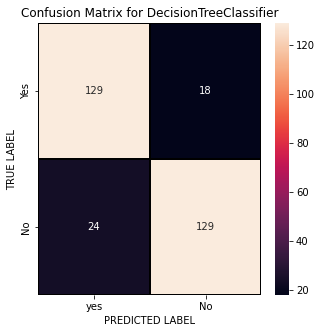

In [149]:
cm = confusion_matrix(y_test,pred)
x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2,linecolor="black",fmt = ".0f",ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for DecisionTreeClassifier')

# KNeighbors Classifier:

In [153]:
kn=KNC()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.6666666666666666
[[ 55  92]
 [  8 145]]
              precision    recall  f1-score   support

           0       0.87      0.37      0.52       147
           1       0.61      0.95      0.74       153

    accuracy                           0.67       300
   macro avg       0.74      0.66      0.63       300
weighted avg       0.74      0.67      0.64       300



Text(0.5, 1.0, 'Confusion Matrix for KneighborsClassifier')

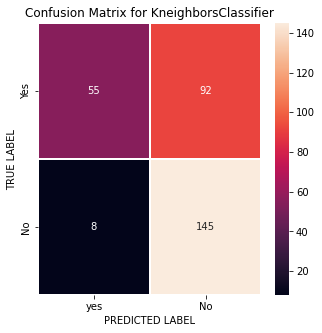

In [154]:
cm = confusion_matrix(y_test,pred)
x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2,fmt = ".0f",ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KneighborsClassifier')

# Support Vector Machine Classifier:

In [155]:
SVM=SVC()
SVM.fit(x_train,y_train)
pred=SVM.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is  ',acc)
print('Confusion Matrix is ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report is ','\n',classification_report(y_test,pred))

Accuracy_Score is   0.8633333333333333
Confusion Matrix is  
 [[128  19]
 [ 22 131]]
Classification Report is  
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       147
           1       0.87      0.86      0.86       153

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



Text(0.5, 1.0, 'Confusion Matrix for SupportVectorMachineClassifier')

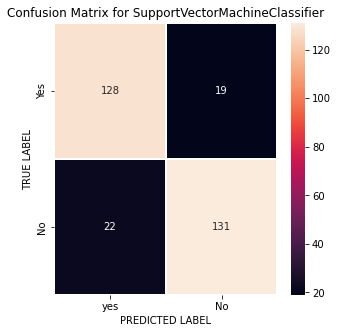

In [156]:
cm = confusion_matrix(y_test,pred)
x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2,fmt = ".0f",ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SupportVectorMachineClassifier')

# AdaBoost Classifier:

In [159]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred=ABC.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is ',acc)
print('Confusion_Matrix is ',confusion_matrix(y_test,pred))
print('Classification_Report is ','\n',classification_report(y_test,pred))

Accuracy_Score is  0.8733333333333333
Confusion_Matrix is  [[128  19]
 [ 19 134]]
Classification_Report is  
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       147
           1       0.88      0.88      0.88       153

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



Text(0.5, 1.0, 'Confusion Matrix for AdaboostClassifier')

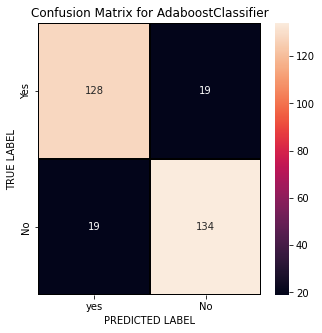

In [160]:
cm = confusion_matrix(y_test,pred)
x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2,linecolor="black",fmt = ".0f",ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaboostClassifier')

# Cross Validation:

In [170]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5,test_size=0.30,random_state=maxRS)
cvs = cross_val_score(RFC,x,y,cv=cv)
print("CV Score of Random Forest Classifier is ",cvs.mean())

Cross Validation of Random Forest Classifier is  0.8906666666666666


In [172]:
cv = ShuffleSplit(n_splits=5,test_size=0.30,random_state=maxRS)
cvs = cross_val_score(kn,x,y,cv=cv)
print("CV Score of KNeighbors Classifier is",cvs.mean())

Cross Validation of KNeighbors Classifier is 0.6471111111111111


In [173]:
cv = ShuffleSplit(n_splits=5,test_size=0.30,random_state=maxRS)
cvs = cross_val_score(dtc,x,y,cv=cv)
print("CV Score of DecisionTreeClassifier is ",cvs.mean())

Cross Validation of DecisionTreeClassifier is  0.8404444444444443


In [176]:
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(SVM, x, y, cv=cv)
print("Cross Validation of SupportVectorMachine Classifier is ",cvs.mean())

Cross Validation of SupportVectorMachine Classifier is  0.8577777777777778


In [177]:
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(ABC,x,y, cv=cv)
print("Cross Validation of AdaBoost Classifier is ",cvs.mean())

Cross Validation of AdaBoost Classifier is  0.8702222222222222


# HyperParameter Tuning:

In [181]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = maxRS,test_size = 0.30)
RFC = RandomForestClassifier()
parameters={'n_estimators' : [100,200],'criterion':['gini','entropy'],'max_depth':range(2,10),'max_features':["auto","sqrt","log2"],}
gridsearch=GridSearchCV(RFC,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'log2',
 'n_estimators': 200}

In [183]:
rfc = RandomForestClassifier(criterion='entropy',max_depth=9,max_features='log2',n_estimators=200)
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
score = accuracy_score(y_test,predrfc)
print("Accuracy Score :",score*100)
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

Accuracy Score : 90.44444444444444
[[203  20]
 [ 23 204]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       223
           1       0.91      0.90      0.90       227

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



Our Model is performing well before Hyperparameter Tuning.

# Saving the Model:

In [193]:
import pickle
filename ='Insurance_Fraud_detection.pickle'
pickle.dump(RFC,open(filename,'wb'))